In [2]:
from sympy import *
import sympy as sp

In [3]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact, fixed, widgets

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.8/site-packages/IPython/core/magics/pylab.py:159: UserWarning: pylab import has clobbered these variables: ['roots', 'trace', 'invert', 'nan', 'test', 'diff', 'plotting', 'sin', 'deprecated', 'ifft', 'Circle', 'tanh', 'cosh', 're', 'Polygon', 'plot', 'var', 'pi', 'power', 'take', 'add', 'partition', 'cos', 'gcd', 'minimum', 'sinc', 'solve', 'vectorize', 'tan', 'log', 'seterr', 'flatten', 'array', 'beta', 'conjugate', 'sign', 'lcm', 'mod', 'zeros', 'poly', 'maximum', 'cbrt', 'Number', 'product', 'exp', 'interactive', 'diag', 'sinh', 'multinomial', 'trunc', 'eye', 'det', 'prod', 'sqrt', 'source', 'ones', 'gamma', 'Line2D', 'reshape', 'transpose', 'fft', 'floor', 'binomial']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


## Problema 1

Supongamos que tenemos un conjunto $m$ de datos de entrada $\textbf{x}$ (en aprendizaje de máquina se les conoce como _features_) y sus datos dependientes, $\textbf{y}$ (_target_ en aprendizaje de máquina). A este conjunto $(x^{(i)}, y^{(i)})$, le llamamos conjunto de entrenamiento. Queremos desarrollar un modelo $\hat{\textbf{y}}$ que aproxime el valor de $\textbf{y}$.

La primera aproximación es intentar una aproximación de forma lineal, conocida como _regresión lineal_, de la forma

$$
\hat{\textbf{y}} = \mathbf\beta_0 + \mathbf\beta_1 \textbf{x}
$$

Donde (si recuerdan Geometría Analítica) $\beta_0$ es el _interceptor_ de la recta $\hat{\textbf{y}}$ y $\beta_1$ es la _pendiente_ de la recta. A $\hat{\textbf{y}}$ se le conoce también como _hipótesis_ y se le puede denotar con la variable $\textbf{h}$. Si definimos que $x_0 \equiv 1$, podemos escribir la _hipótesis_ de manera más compacta:

$$
\hat{\textbf{y}} = \sum_{j=0}^n \beta_j x_j = \mathbf{\beta}^T\textbf{x}
$$

Con esta notación, podemos extender el formalismo a más dimensiones (en este caso $n$).

Una posible definición de **mejor** es que el modelo (el cual está determinado por $\vec\beta$) minimice la suma de las diferencias entre el valor actual $\textbf{y}$ y el predicho $\hat{\textbf{y}}$ (a esta diferencia se le conoce como _error en la predicción_), en otras palabras _minimizar la suma del cuadrado de los residuos_. La función a minimizar se conoce en aprendizaje de máquina como _función de costo_ $\textbf{J}$. Debido a que tenemos varios pares $(x_i, y_i)$, la función costo a minimizar es el _error cuadrático promedio_.

$$\textbf{J}(\beta_0, \beta_1) = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \hat{y}^{(i)}(x^{(i)}))^2 = \frac{1}{2n}\sum_{(x^{(i)}, y^{(i)}) \in X \times Y} (y^{(i)} - \beta_0 - \beta_1 x^{(i)})^2$$

In [21]:
i = Symbol('i')
x = Symbol('x')
y = Symbol('y')
b0 = Symbol('beta_0')
b1 = Symbol('beta_1')
n = Symbol('n')
j = Function('j')
j = Sum((Indexed(y,i) - b0 - b1 * Indexed(x,i))**2, (i, 1, n))/(2*n)
j


Sum((-beta_0 - beta_1*x[i] + y[i])**2, (i, 1, n))/(2*n)

**(a)** Usando **SimPy** demostrar que 

$$
\frac{\partial}{\partial \beta_j} \textbf{J}(\beta) = \frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$
Para el caso de $\beta_0, \beta_1$ en $J(\beta_0,\beta_1)$.

In [25]:
j_0 = Function('j_0')
j_0 = Derivative(Sum(( Indexed(y,i) - b0 - b1 * Indexed(x,i))**2, (i, 1, n))/(2*n), b0).doit()
j_0

Sum(2*beta_0 + 2*beta_1*x[i] - 2*y[i], (i, 1, n))/(2*n)

In [26]:
j_1 = Derivative(j, b1).doit()
j_1

Sum(-2*(-beta_0 - beta_1*x[i] + y[i])*x[i], (i, 1, n))/(2*n)

## Problema 2

Usando el ejemplo de la clase ( i.e. Los archivos `edad.dat` y `altura.dat` contienen las mediciones de las estaturas (en metros) de varios niños entre las edad de 2 y 8 años. Cada _tupla_ de altura y edad, constituyen un ejemplo de entrenamiento $(x^{(i)}, y^{(i)})$ de nuestros datos. Hay $m = 50$ datos para entrenar que usaremos para realizar un modelo de regresión lineal. ) :

<div class="alert alert-warning">
_repetir hasta que lograr convergencia {_

$$
\beta_j := \beta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}\left(\hat{y}(x^{(i)}) - y(x^{(i)})\right) \cdot x^{(i)}_j
$$

_}_
</div>

**(a)** Grafique $\textbf{J}(\beta)$ del ejercicio en $3D$ y en una gráfica de contorno. 

Text(0.5, 0, 'BETA_1')

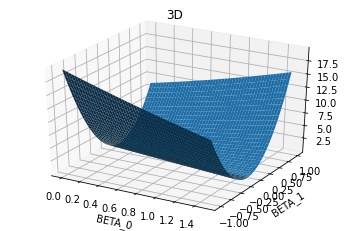

In [155]:
X = np.loadtxt('edad.dat')
Y = np.loadtxt('altura.dat')
m = len(X)
b0 = np.arange(0,1.5,.001) 
b1 = np.arange(-1,1,.001) #pendiente
BETA_0, BETA_1 = np.meshgrid(b0,b1)

def J(b_0, b_1):
    costo = 0
    for i in range(0,m):
        costo += (Y[i]-b_0-b_1*X[i])**2
    costo /=(2*m)
    return costo


#3D
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection = '3d')
ax.set_title("3D")
ax.plot_surface(BETA_0,BETA_1,J(BETA_0,BETA_1)) #plot (x,y,z), con z = f(x,y)
plt.xlabel('BETA_0',fontsize=10)
plt.ylabel('BETA_1',fontsize=10)

[[19.58566083 19.57967307 19.57368631 ... 11.74174306 11.7372523
  11.73276255]
 [19.55307944 19.5470966  19.54111477 ... 11.71653226 11.71204642
  11.70756159]
 [19.52052521 19.5145473  19.50857039 ... 11.69134862 11.68686771
  11.6823878 ]
 ...
 [ 8.66280936  8.66665398  8.67049959 ... 15.53795432 15.54329594
  15.54863855]
 [ 8.68447866  8.6883282   8.69217874 ... 15.56699421 15.57234074
  15.57768828]
 [ 8.70617513  8.71002959  8.71388505 ... 15.59606126 15.60141272
  15.60676518]]


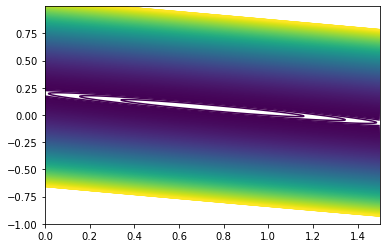

In [109]:
fig = plt.figure()
plt.contour(BETA_0,BETA_1,J(BETA_0,BETA_1), levels = np.arange(0,10,.01))


**(b)** Indique con un punto el valor de $\textbf{J}(\beta)$ en la última iteración.



In [ ]:
fig = plt.figure()
plt.contour(BETA_0,BETA_1,J(BETA_0,BETA_1), levels = np.arange(0,10,.01))
plt.scatter([.73300235,], [.06700325, ], 100, color = "red")


**(c)** Modifique el _widget_ para mostrar conforme pasan las iteraciones como el valor de $\textbf{J}(\beta)$ se acerca al mínimo en la gráfica de contorno.


In [157]:
r = RegresionLineal();
r.gradientDescent(X,Y)



**(d)** Agrega al _widget_ un control para modificar $\alpha$ (habrá que agregar el entrenamiento del modelo a la función que estás realizando para este _widget_)

In [136]:
BETA_1[:,0]

array([-1.   , -0.999, -0.998, ...,  0.997,  0.998,  0.999])

In [135]:
ma = np.arange(10).reshape((2,5))
ma[:,1]

array([1, 6])

In [130]:
ma

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

## Problema 3

In [154]:

class RegresionLineal:
    def __init__(self, alpha=0.3, max_iters=100, tols=0.001):
        """
        Parámetros.
        ---------------
        alpha = Learning rate
        max_iters = Número máximo de iteraciones
        tols = definición de convergencia
        """
        self.alpha = alpha
        self.max_iters = max_iters
        self.tols = tols
        self.breaking_iteration = None
        self.historia = {'costo':[], 'beta':[]}  # Con fines de graficación
        
    def gradientDescent(self, x, y):
        """
        Parámetros:
        ---------------
        x = vector de entrenamiento de features
        y = vector de entrenamiento de variable a predecir (target)
        """    
        
        # ajustamos el vector de features
        unos = np.ones((x.shape[0], 1))
        Xt = X.reshape(x.shape[0], 1)
        Xt = np.concatenate((unos, Xt), axis=1)
        
        i = 0
        prep_J = 0
        m, n = Xt.shape
        self.beta = np.zeros(n) 
        
        while i < self.max_iters:     
            # Actualizamos beta
            self.beta = self.beta - self.alpha * self.gradiente(Xt, y)
            
            J = self.costo(Xt, y)
            
            if abs(J - prep_J) <= self.tols:
                print('La función convergió con beta: %s en la iteración %i' % ( str(self.beta), i ))
                self.breaking_iteration = i
                return self.beta
                break
            else:
                prep_J = J
            
            self.historia['costo'].append(J)
            self.historia['beta'].append(self.beta)                
            i += 1
    
    def hipotesis(self, x):
        return np.dot(x, self.beta)
    
    def lineal(self,x,y):
        n = len(x)
        Pxy =Sx=Sy=Sx_2=0.0;
        a = 0
        b = 0
        for i in range(n):
            Sx +=x[i]
            Sy +=y[i]
            Sx_2 +=x[i]*x[i]
            Pxy +=x[i]*y[i]
            i +=1
        b =(n*Pxy-Sx*Sy)/(n*Sx_2-Sx*Sx)
        a =(Sy-b*Sx)/n
        return a,b
    
    def costo(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y
        return np.dot(error.T, error) / (2 * m) 
    
    def gradiente(self, x, y):
        m = x.shape[0]
        error = self.hipotesis(x) - y        
        return np.dot(x.T, error) / m    

**(a)**  Usando los datos de `chirps.txt`

In [37]:
%cat chirps.txt

#Chirps/Second 	Temperature (º F)
20.0 	88.6
16.0 	71.6
19.8 	93.3
18.4 	84.3
17.1 	80.6
15.5 	75.2
14.7 	69.7
15.7 	71.6
15.4 	69.4
16.3 	83.3
15.0 	79.6
17.2 	82.6
16.0 	80.6
17.0 	83.5
14.4 	76.3


Entrenar una regresión lineal. Grafique los datos y el mejor modelo. Explique como llegó a los valores de $\alpha$. ¿Coinciden con los mostrados en la página web?

In [51]:
lec = np.loadtxt('chirps.txt')
X = np.zeros(len(lec))
Y = np.zeros(len(lec))
i = 0
for l in lec:
    X[i] = lec[i,0]
    Y[i] = lec[i,1]
    i = i + 1


La función convergió con beta: [22.81065582  3.4126137 ] en la iteración 92561


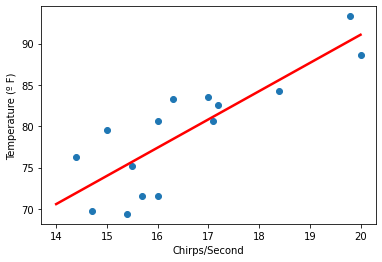

In [79]:
plt.scatter(X,Y, label="data")
plt.xlabel('Chirps/Second')
plt.ylabel('Temperature (º F)')
r = RegresionLineal(alpha=0.007, max_iters=100000, tols=0.000000001)
beta =r.gradientDescent(X,Y)
plt.plot([14, 20], [beta[0]+14*beta[1],beta[0]+20*beta[1] ], color='red', linewidth=2.5, linestyle="-") #Gráfica la línea que mejor aproxima los puntos


Los datos de la beta0 y beta 1 son muy parecidos a los datos mostrados en la página. Pero en cuanto a los decimales cada uno tiene un porcentaje de error. beta0 Dio 22.81 en vez de 22.85 y beta 1 dio 3.412 en vez de 3.41.



# # Problema 4

**(a)** Usando los datos del [cuarteto de Anscombe](http://en.wikipedia.org/wiki/Anscombe%27s_quartet) Calcule la regresión lineal ¿Qué sucede?



In [136]:
%cat AnscombesQuartet.txt

x1 	y1 	x2 	y2 	x3 	y3 	x4 	y4 
10.0	8.04	10.0	9.14	10.0	7.46	8.0 	6.58
8.0 	6.95	8.0 	8.14	8.0 	6.77	8.0 	5.76
13.0	7.58	13.0	8.74	13.0	12.74	8.0 	7.71
9.0 	8.81	9.0 	8.77	9.0 	7.11	8.0 	8.84
11.0	8.33	11.0	9.26	11.0	7.81	8.0 	8.47
14.0	9.96	14.0	8.10	14.0	8.84	8.0 	7.04
6.0 	7.24	6.0 	6.13	6.0 	6.08	8.0 	5.25
4.0 	4.26	4.0 	3.10	4.0 	5.39	19.0	12.50
12.0	10.84	12.0	9.13	12.0	8.15	8.0 	5.56
7.0 	4.82	7.0 	7.26	7.0 	6.42	8.0 	7.91
5.0 	5.68	5.0 	4.74	5.0 	5.73	8.0 	6.89


In [81]:
lec = np.loadtxt('AnscombesQuartet.txt')
X1 = np.zeros(len(lec))
Y1 = np.zeros(len(lec))
X2 = np.zeros(len(lec))
Y2 = np.zeros(len(lec))
X3 = np.zeros(len(lec))
Y3 = np.zeros(len(lec))
X4 = np.zeros(len(lec))
Y4 = np.zeros(len(lec))
i = 0
for l in lec:
    X1[i] = lec[i,0]
    Y1[i] = lec[i,1]
    X2[i] = lec[i,2]
    Y2[i] = lec[i,3]
    X3[i] = lec[i,4]
    Y3[i] = lec[i,5]
    X4[i] = lec[i,6]
    Y4[i] = lec[i,7]
    i = i + 1


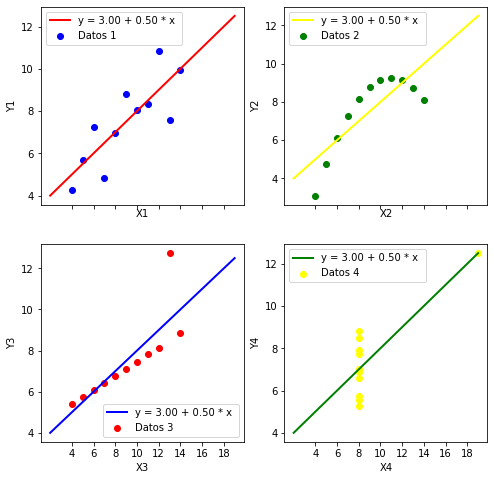

In [90]:
fig, ax = plt.subplots(2,2, figsize=(8,8), sharex = True)
ax[0][0].scatter(X1, Y1, label="Datos 1", color="blue")
ax[0][1].scatter(X2, Y2, label="Datos 2", color="green")
ax[1][0].scatter(X3, Y3, label="Datos 3", color="red")
ax[1][1].scatter(X4, Y4, label="Datos 4", color="yellow")
ax[0][0].set_xlabel("X1")
ax[0][0].set_ylabel("Y1")
ax[0][1].set_xlabel("X2")
ax[0][1].set_ylabel("Y2")
ax[1][0].set_xlabel("X3")
ax[1][0].set_ylabel("Y3")
ax[1][1].set_xlabel("X4")
ax[1][1].set_ylabel("Y4")
r1 = RegresionLineal(alpha=0.000003, max_iters=1000000, tols=0.0000001)
a1,b1 = r1.lineal(X1,Y1)
ax[0][0].plot([2, 19], [a1+2*b1,a1+19*b1 ],label="y = %1.2f + %1.2f * x " % (a1,b1), color='red', linewidth=2, linestyle="-")
ax[0][0].set_xticks(np.arange(4,20,2), minor=False)


r2 = RegresionLineal(alpha=0.000003, max_iters=1000000, tols=0.0000001)
a2,b2 = r2.lineal(X2,Y2)
ax[0][1].plot([2,19], [a2+2*b2,a2+19*b2 ],label="y = %1.2f + %1.2f * x " % (a2,b2), color='yellow', linewidth=2, linestyle="-")

r3 = RegresionLineal(alpha=0.000003, max_iters=1000000, tols=0.0000001)
a3,b3 = r3.lineal(X3,Y3)
ax[1][0].plot([2,19], [a3+2*b3,a3+19*b3 ], label="y = %1.2f + %1.2f * x " % (a3,b3), color='blue', linewidth=2, linestyle="-")

r4 = RegresionLineal(alpha=0.000003, max_iters=1000000, tols=0.0000001)
a4,b4 = r4.lineal(X4,Y4)
ax[1][1].plot([2, 19], [a4+2*b4,a4+19*b4 ], label="y = %1.2f + %1.2f * x " % (a4,b4), color='green', linewidth=2, linestyle="-")

ax[0][0].legend(loc = "best")
ax[0][1].legend(loc = "best")
ax[1][0].legend(loc = "best")
ax[1][1].legend(loc = "best")

## Problema 5

Use el archivo `radioactive_decay.dat`

In [166]:
%cat radioactive_decay.txt

#time   N_(remaining)
0.0	10.48
1.0	7.54
2.0	5.49
3.0	4.02
4.0	2.74
5.0	2.02
6.0	1.50
7.0	1.09
8.0	0.68
9.0	0.57
10.0	0.37
11.0	0.31
12.0	0.19
13.0	0.15
14.0	0.13
15.0	0.11


**(a)** Grafique los datos ¿Qué forma tienen?

Text(0, 0.5, 'N_(remaining)')

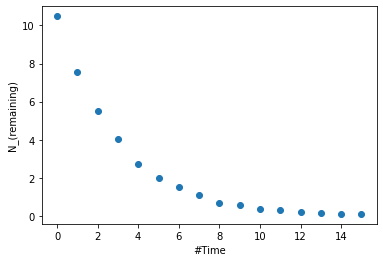

In [139]:
lec = np.loadtxt('radioactive_decay.txt')
Xr = np.zeros(len(lec))
Yr = np.zeros(len(lec))
i = 0
for l in lec:
    Xr[i] = lec[i,0]
    Yr[i] = lec[i,1]
    i = i + 1
    
plt.scatter(Xr,Yr, label="data")
plt.xlabel('#Time')
plt.ylabel('N_(remaining)')

#Tiene forma de e**-c1(x + c2) o -ln(x)

**(b)** ¿Qué transformación se le ocurre para linearizarlos? Explique y grafique de nuevo. Guarde los datos transformados en un archivo llamado `transform_radioactive_decay.txt`

Transformación que se me ocurre es hacer ln(y). 

Text(0, 0.5, 'ln(N_(remaining))')

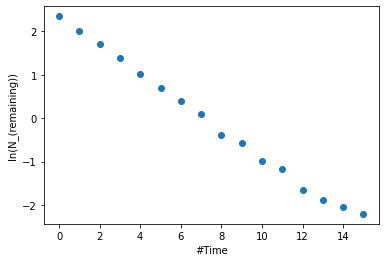

In [172]:
lec = np.loadtxt('radioactive_decay.txt')
Xr = np.zeros(len(lec))
YrLog = np.zeros(len(lec))
xy = np.zeros((len(lec),2))
i = 0
for l in lec:
    Xr[i] = lec[i,0]
    YrLog[i] = ln(lec[i,1])
    i = i + 1 
xy[:,0] = Xr
xy[:,1] = YrLog
c = np.savetxt('transform_radioactive_decay.txt', xy)  

plt.scatter(Xr,YrLog, label="data")
plt.xlabel('#Time')
plt.ylabel('ln(N_(remaining))')

**(c)** Aplique la regresión lineal a este conjunto de datos transformado, leyendo los datos del archivo recién creado.

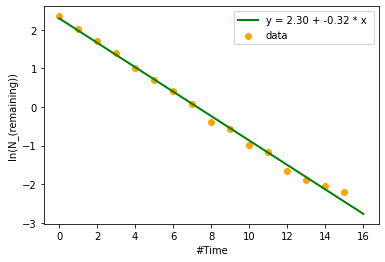

In [175]:
lec = np.loadtxt('transform_radioactive_decay.txt')
Xr = np.zeros(len(lec))
YrLog = np.zeros(len(lec))
i = 0
for l in lec:
    Xr[i] = lec[i,0]
    YrLog[i] = lec[i,1]
    i = i + 1 

rLog = RegresionLineal(alpha=0.000003, max_iters=1000000, tols=0.0000001)
aL,bL = rLog.lineal(Xr,YrLog)
plt.scatter(Xr,YrLog, label="data", color = "orange")
plt.xlabel('#Time')
plt.ylabel('ln(N_(remaining))')
plt.plot([0,16], [aL+0*bL,aL+16*bL ],label="y = %1.2f + %1.2f * x " % (aL,bL), color='green', linewidth=2, linestyle="-")
plt.legend(loc='best')



**(d)** ¿Cuáles son los valores de $\beta$ que mejor ajustan? ¿Cuáles son el espacio sin transformar? Explique.

In [179]:
beta = (aL, bL)

In [180]:
beta


(2.2966149771263673, -0.3166483663835882)